# Plot Dart Board Data with Errorbars
Plots dart board data for each observer with the session date on the x-axis and stereo acuity on the y-axis. <br>
There is a key legend for all dificulty levels (Yellow = 1, Orange = 2, Red = 3)

In [1]:
import matplotlib.pyplot as plt
import datetime as dt
import os
import pandas as pd
from scipy import stats
import numpy as np

### Get dates of sessions for an observer

In [2]:
# def get_dates(path):
#     def concat_strs(x):
#         date, time = x.replace('.', '_').split('_')[2:4]
#         return date + ':' + time
#     unformatted_dates = [concat_strs(x) for x in os.listdir(path)]
#     return [dt.datetime.strptime(d,'%Y-%m-%d:%I-%M-%S-%p') for d in unformatted_dates]

### Plot y values for an observer

In [3]:
def plot_yvals(path, x_ticks, colors):
#     index = 0
    labels = ["Natural", "Advanced", "Expert"]
    vals = {"Natural":[], "Advanced":[], "Expert":[]}
    for x in os.listdir(path):
        df = pd.read_csv(path + x)
#         offset = -0.2
        for i in range(0, 3):
            stereo_acuity = df.query('Difficulty == {}'.format(i + 1))["SA[seconds] dartboard hit"]
#             mean = np.mean(stereo_acuity)
#             std_err_mean = stats.sem(stereo_acuity)
            median = np.median(stereo_acuity)
            vals[labels[i]].append(median)
#             label = labels[i]
#             plt.errorbar(x_ticks[index] + offset, mean, yerr=std_err_mean, color=colors[i], label=label, fmt='-o')
#             plt.plot(x_ticks[index] + offset, median, '-o', color=colors[i], label=label, markersize=14)
#             offset += 0.2
#         index += 1
#     offset = -0.2
    index = 0
    for key in labels:
        plt.plot(x_ticks, vals[key], '-o', markersize=.4*len(x_ticks), label=key, color=colors[index], alpha=0.7)
        index += 1
#         offset += -.2

### Navigate to the proper directory for each observer and plot

In [4]:
def plot_observers(obs_dir, sub_dir, group, result_dir):
    for observer in os.listdir(obs_dir):
        if len(observer) != 2 or observer not in group:
            continue
            
        path = obs_dir + observer + sub_dir
        if len(os.listdir(path)) < 1:
            continue
            
            
        fig = plt.figure()
        x_axis = range(1, len(os.listdir(path)) + 1)
        ax = fig.add_axes([.1, .2, len(x_axis)/10, len(x_axis)/10])
        ax.set_ylabel('Stereo Acuity (seconds)', labelpad=20, fontsize=30)
        ax.set_xlabel('Session Number', labelpad=20, fontsize=30)
        
        plt.xticks([x for x in range(len(x_axis))], x_axis)
        ax.tick_params(axis='both', which='major', pad=15, labelsize=18)
#         plt.gcf().autofmt_xdate()
        
        
        # Colors according to [difficulty 1, difficulty 2, difficulty 3]
        colors = ['blue', 'green', 'red']
        plot_yvals(path, ax.get_xticks(), colors)
        
        
        # Creating the legend for the figure
        handles, labels = ax.get_legend_handles_labels()
        for h in handles: h.set_linestyle("")
        ax.legend(handles[:3], labels[0:3], loc='upper right', fontsize=(.8*len(x_axis)))
        for h in handles: h.set_linestyle("-")

        
        # Save the figure
        fig.savefig(result_dir + observer + '.pdf', bbox_inches='tight')
        plt.close(fig)

### Plot the Control observers

FileNotFoundError: [Errno 2] No such file or directory: '../graphs/errorbar-results/control/ah.pdf'

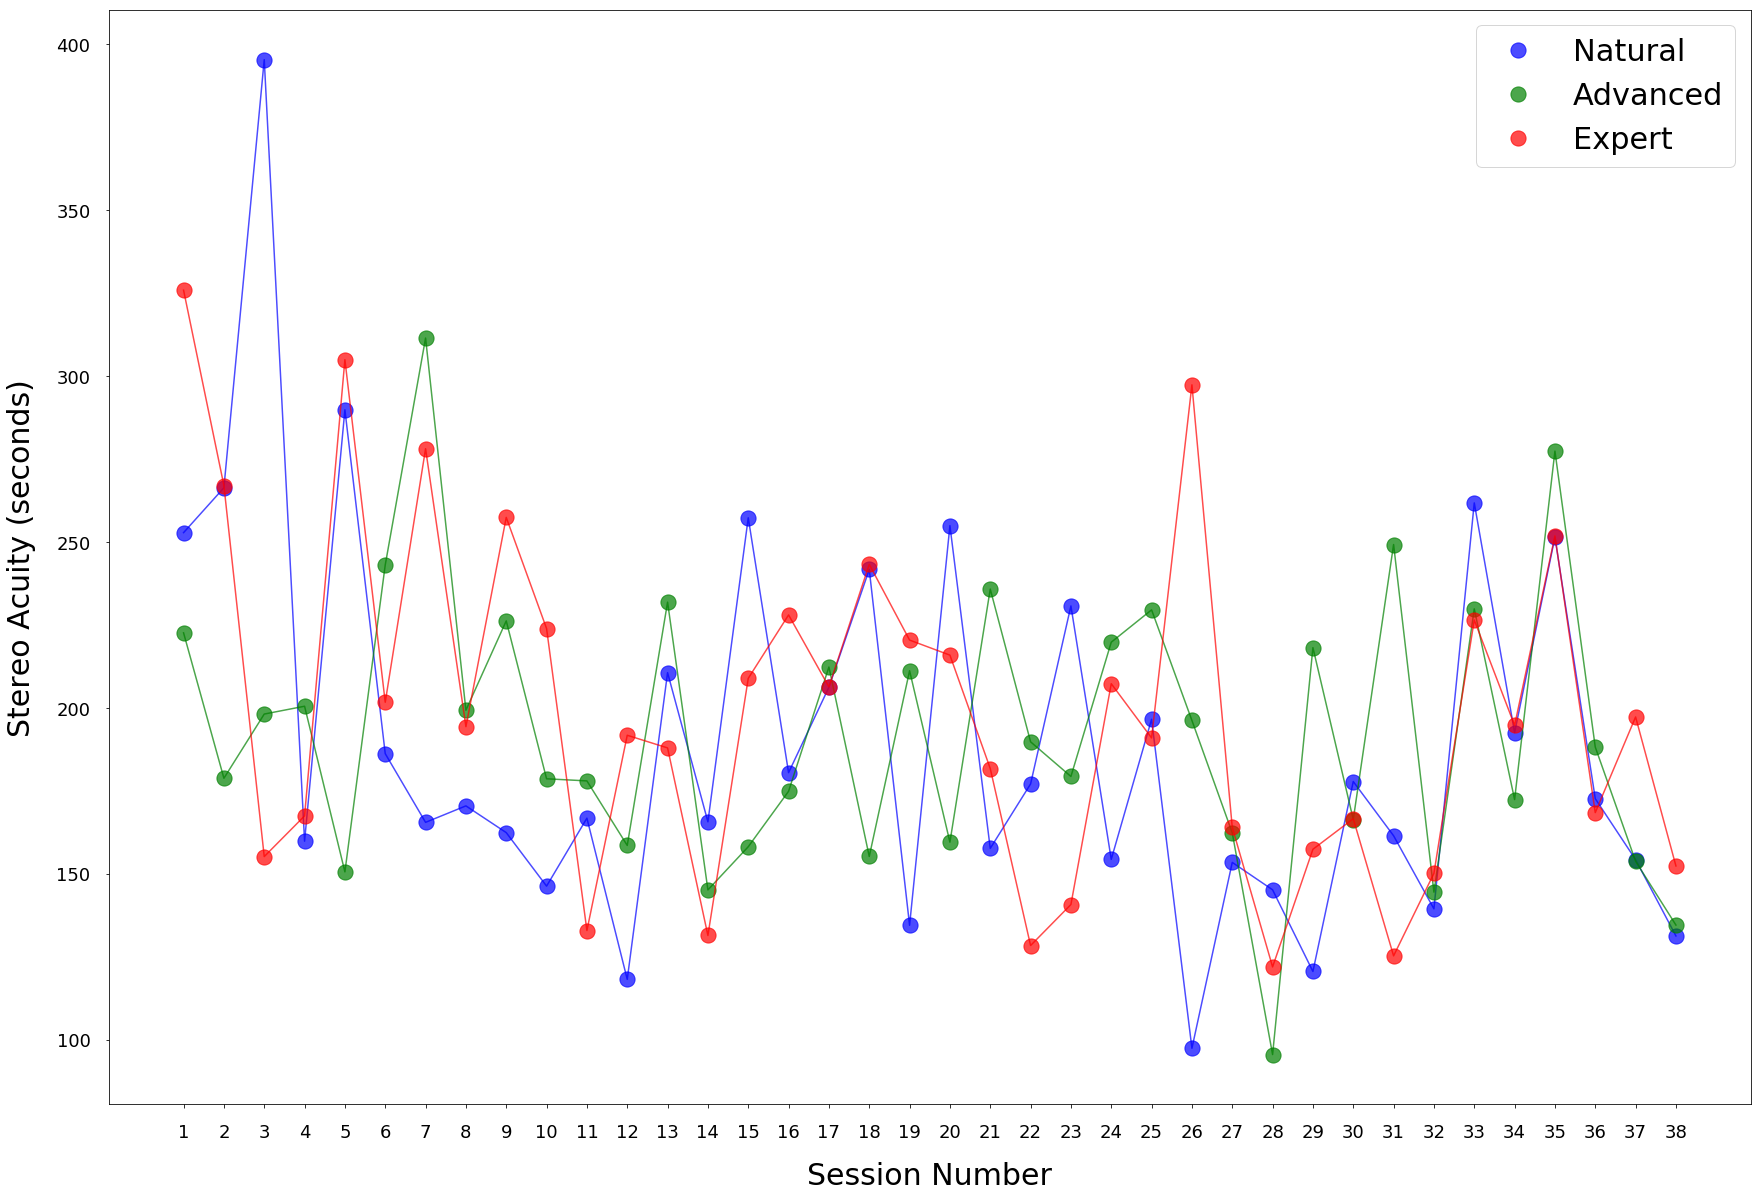

In [5]:
OBSERVER_DIRECTORY = "../GameObservers/"
SUB_DIR = "/DartBoard/"
RESULT_DIR = '../graphs/errorbar-results/control/'
CONTROL = set(['ah', 'aj', 'dd', 'dl', 'ez', 'it', 'll', 'sh', 'sm', 'sr'])

plot_observers(OBSERVER_DIRECTORY, SUB_DIR, CONTROL, RESULT_DIR)

### Plot the Experimental observers

FileNotFoundError: [Errno 2] No such file or directory: '../graphs/errorbar-results/experimental/bb.pdf'

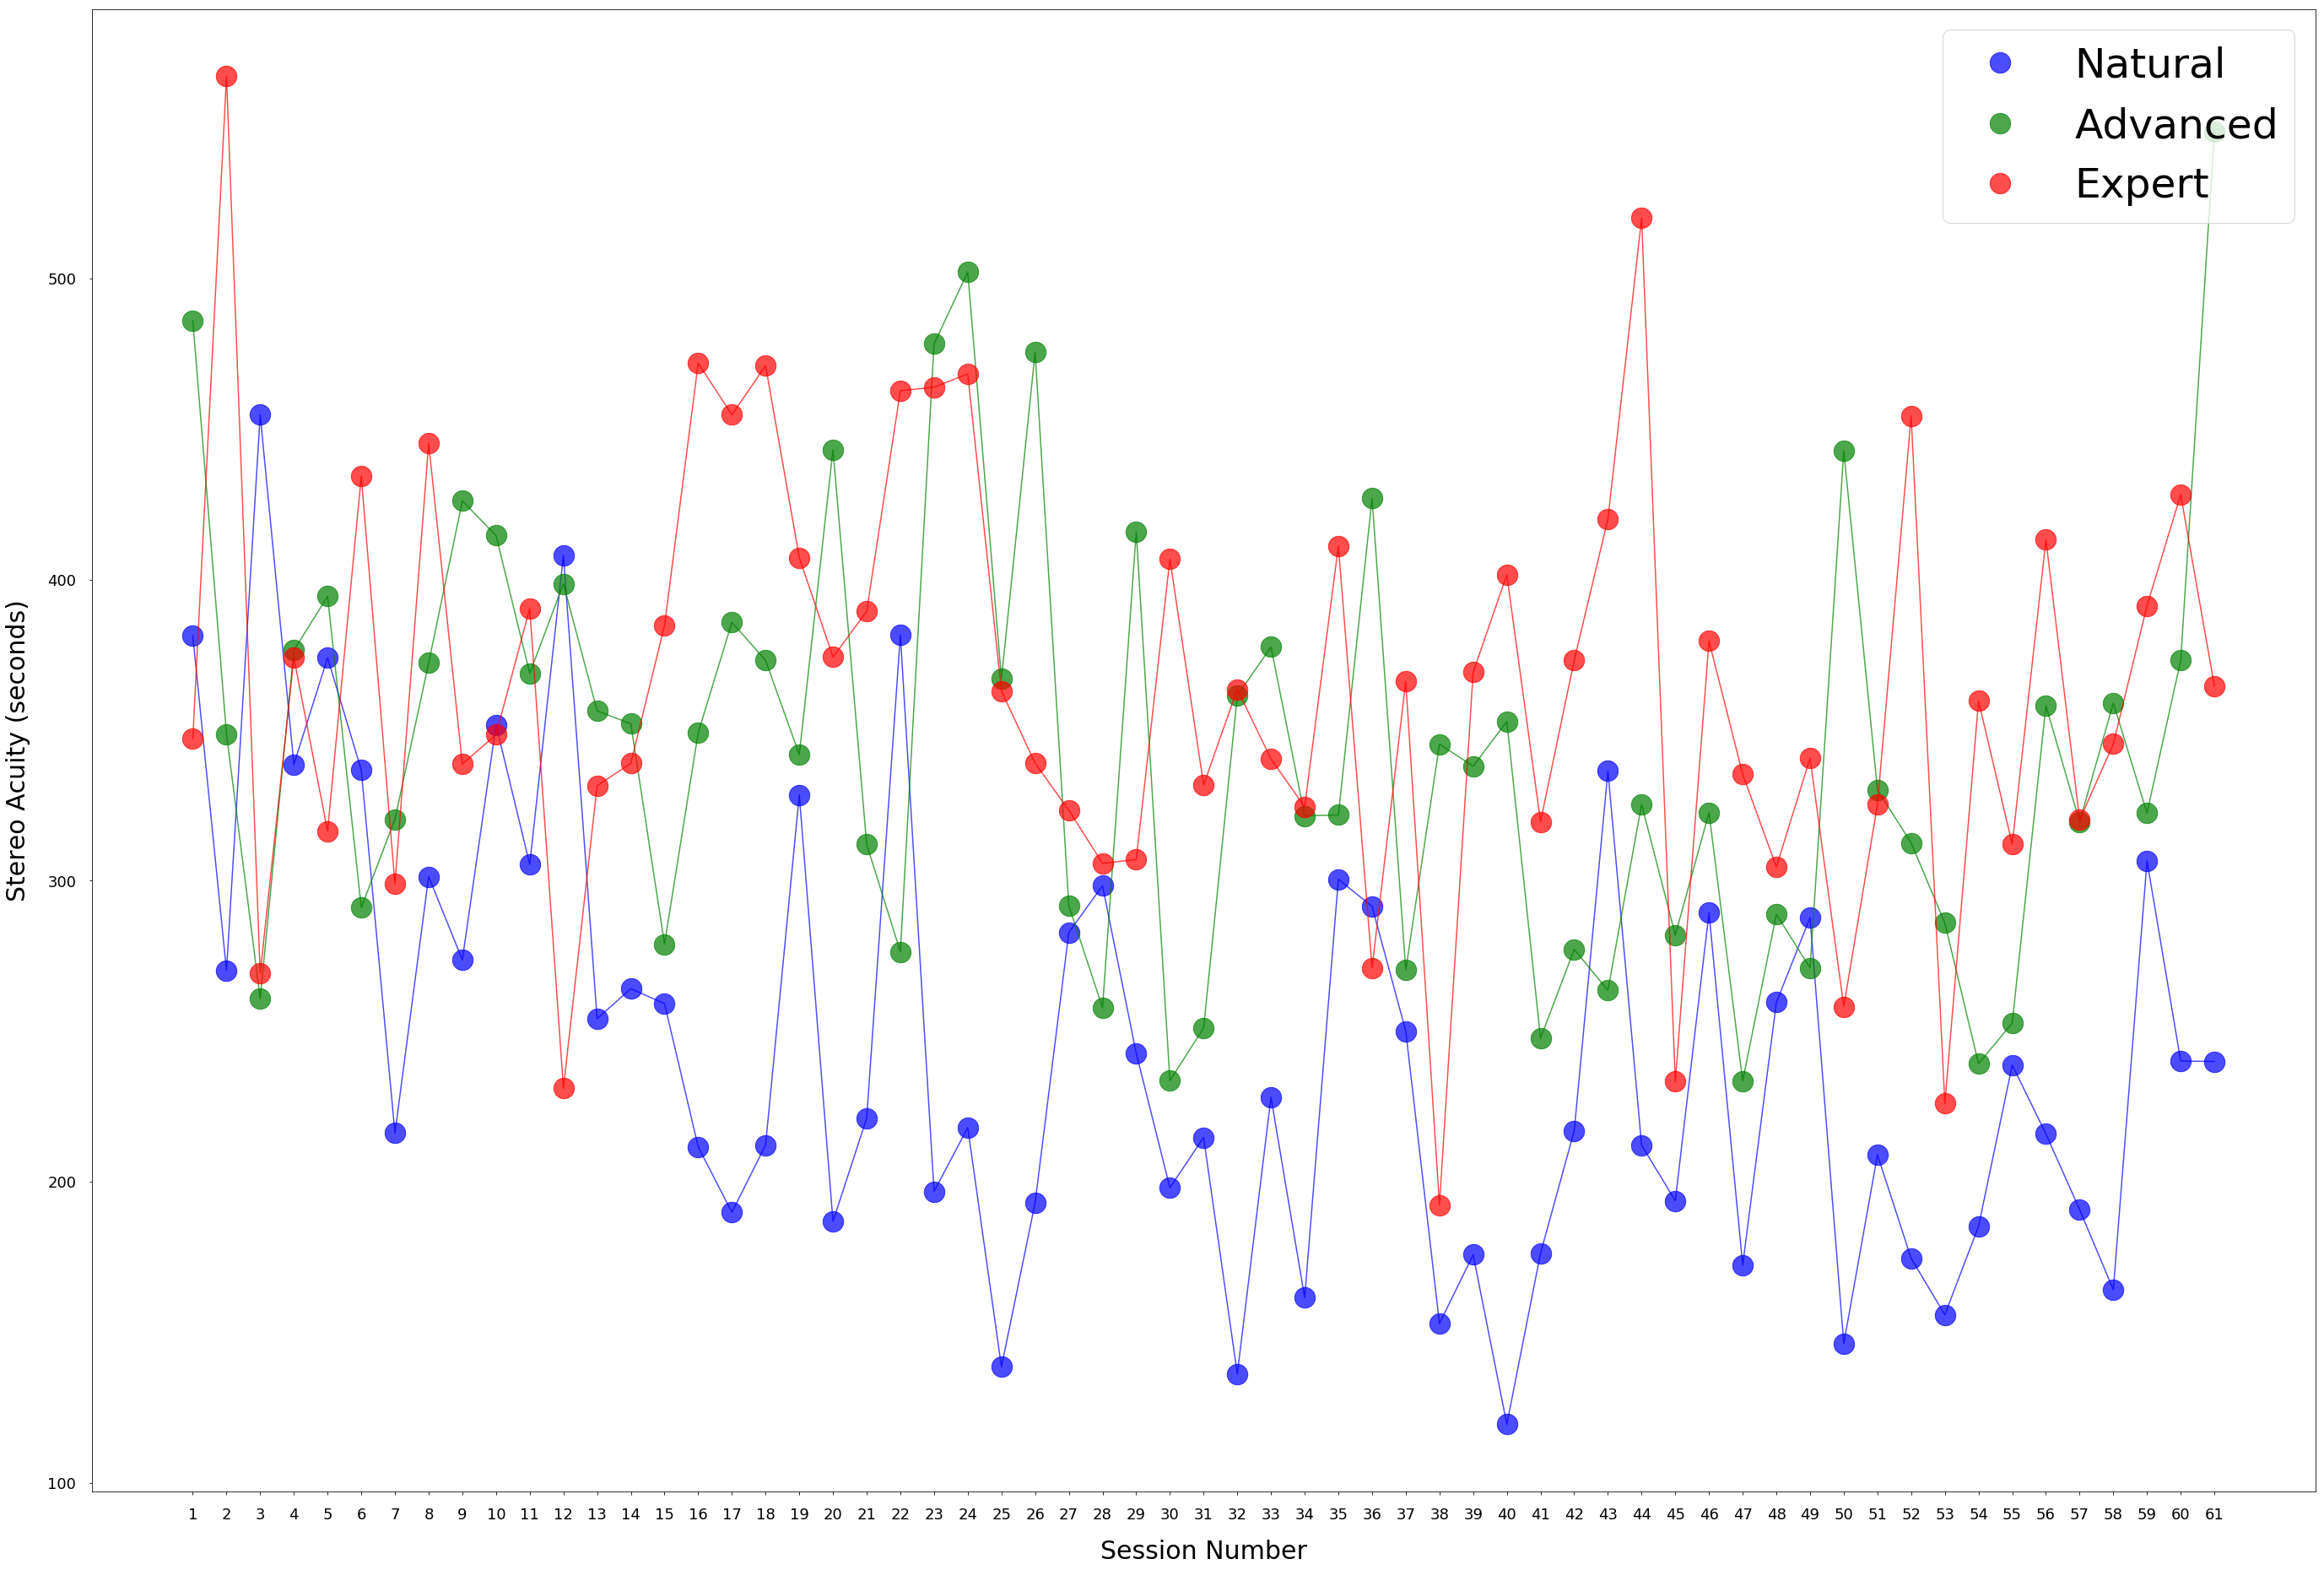

In [6]:
EXPERIMENTAL = set(['bb', 'by', 'co', 'et', 'gn', 'gp', 'jz', 'kp', 'ky', 'mb', 'mg', 'ni'])
RESULT_DIR = '../graphs/errorbar-results/experimental/'

plot_observers(OBSERVER_DIRECTORY, SUB_DIR, EXPERIMENTAL, RESULT_DIR)